## Laboration 1, Databehandling
#### _Björn Winterfjord_

#### Uppgift a)
Vi importerar nödvändiga bibliotek, och läser in filen College.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

college = pd.read_csv("College.csv")

#### Uppgift b)
Vi observerar att datasetet har "College" som en av kategorierna. Eftersom collegenamnen är unika, vore det lämpligt att använda dessa som index. Detta kan vi åstadkomma på olika sätt, här nedan visas två.

In [ ]:
college2=pd.read_csv("College.csv", index_col=0)

college3=college.rename({"Unnamed: 0": "College"}, axis=1)
college3=college3.set_index("College")

#### Uppgift c)
Av de två metoderna ovan, väljer vi _set_index_-metoden, och sparar den alltså under namnet _college_. Vi gör en snabb undersökning av några statistiska variabler hos datasetet med hjälp av _describe_.

In [3]:
college=college3
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### Uppgift d)
Vi undersöker om det finns några intressanta samband mellan tre av variablerna (_Andel Top 10%-studenter_, _Ansökningar_ samt _Antagna_), genom att göra _scatter plots_. Se resultat här nedan.

Det kanske tydligaste sambandet ser vi mellan __Apps__ (_ansökningar_) och __Enroll__ (_antagna_), vilket inte är oväntat. Har man få ansökningar kan man bara ta emot få studenter, medan de stora universiteten får många ansökningar, och många antagna studenter. Det är rimligt att anta att de "finaste" skolorna (_Ivy League_) har relativt få antagna i förhållande till antalet ansökningar, men detta ska vi undersöka senare.

Intressant är också att vi i __Apps__-kolumnen har en utliggare (_Rutgers University_) med mer än dubbelt så många ansökningar som någon annan skola. Det är möjligt att det är en felaktig siffra, men vi låter den vara kvar.

Det är inte lika tydliga trender när vi plottar __Top10perc__ mot __Apps__ eller __Enroll__. (__Top10perc__ anger alltså hur stor andel av varje colleges studenter som tillhörde de 10% högst presterande i High School). Det kanske inte heller var väntat: Bland de mest exklusiva skolorna, alltså de med högst värden på __Top10perc__, finns såväl stora som små skolor, alltså höga och låga värden på __Apps__ och __Enroll__. Och samma sak med de "sämre" skolorna, det finns både stora och små skolor av den typen också. Inga tydliga trender här alltså, utan ganska låg korrelation.



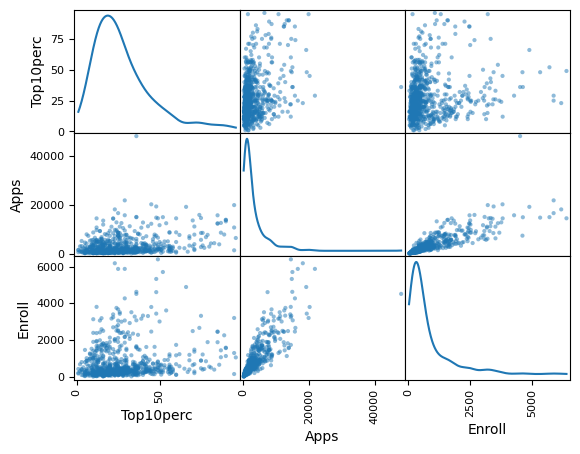

In [4]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]], diagonal="kde")
plt.show()

#### Uppgift e)
Nu ska vi jämföra __Out-of-state tuition__ (den årliga avgift man betalar till skolan om man bor i en annan delstat) för privatskolor och publika skolor. Detta gör vi med hjälp av en _boxplot_ (ibland kallat _lådagram_ på svenska).

Vi misstänker att privata skolor överlag har högre avgifter, och boxploten ger oss rätt: Medianavgiften ligger betydligt högre hos de privata skolorna än de publika. Det är t.o.m. så att den 25:e percentilen hos de privata ligger _över_ den 75:e percentilen bland de publika. Det kanske mest förvånande är kanske istället att de "billigaste" skolorna ligger på ungefär samma nivå bland publika och privata.

Överlag kan man därmed säga att de privata skolorna har betydligt större spridning bland sina avgifter; de lägsta i paritet med de publikas lägsta, men även många skolor i ett betydligt dyrare skikt. Värt att notera är dock det stora antalet utliggare bland de publika skolorna, här finns alltså några skolor som skiljer sig rejält från det mittersta kvartilintervallet. Detta gör att boxploten blir ett något trubbigt jämförelseverktyg i detta fall.

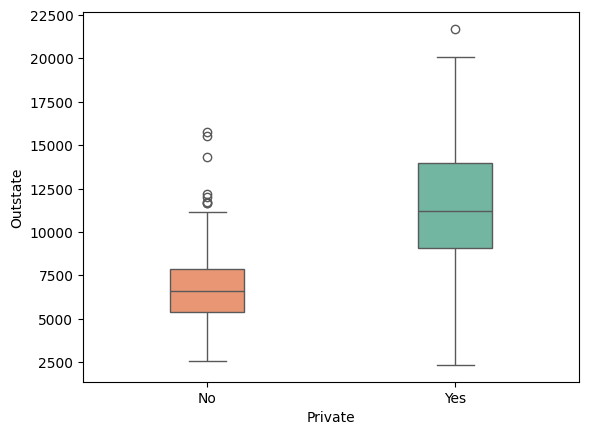

In [13]:
sns.boxplot(data=college, x="Private", y="Outstate", hue="Private", width=0.3, order=["No", "Yes"], palette="Set2")
plt.show()

#### Uppgift f)
Nu delar vi upp skolorna efter hur stor andel av deras studenter som presterade bland de högsta 10% i High School. De skolor med en sådan andel över 50% kallar vi _Elite_. En _value_counts_ ger vid handen att det finns 78 skolor som tillhör _Elite_-gruppen. Nu ska vi göra en liknande jämförelse som i förra uppgiften, vi ska jämföra __Out-of-state__-kostnaden för skolor i _Elite_-gruppen, med övriga skolor. Vi misstänker att kostnaden överlag är högre bland _Elite_-skolorna, men det är även intressant att jämföra utfallet med föregående uppgift, då det troligen finns en tydlig korrelation mellan att tillhöra _Elite_ och att vara _Private_.

När vi tittar på boxploten så ser vi mycket riktigt att mediankostnaden, och även Q1 och Q3, ligger betydligt högre hos _Elite_-skolorna, vilket nog inte förvånar någon. Dock ser vi att de allra dyraste skolorna ligger på ungefär samma nivå, oavsett _Elite_ eller ej. Detta, i kombination med det faktum att vi har väldigt korta avstånd mellan __Median - Q3 - Max__ hos _Elite_-skolorna (istället för den mer förväntade normalfördelningen), gör att vi kan misstänka att det finns en rekommenderad(?) maxgräns kring $ 20 000/år. Många av _Elite_-skolorna ligger nära denna maxgräns, och även ett fåtal ur den övriga gruppen. (Vi ser även ett par utliggare, som kanske har dispens att ta ut en högre kostnad.)

Jämför vi denna boxplot med boxploten i uppgift e), så inser vi att det enbart är privatskolor som tar ut de högre kostnaderna. Vi kan också konstatera att då vi jämför privata pch publika skolor, så är det jämnt skägg i det _lägre_ kostnadsskiktet (kring $ 2500), medan det (som nyss konstaterats) är jämnt vid den allra _högsta_ gränsen då vi jämför _Elite_ med övriga. Överlag ligger dock kostnaderna naturligtvis betydligt högre hos såväl _Elite_ som _Private_, och dessa två grupper överlappar varandra troligen till stor del.

Elite
No     699
Yes     78
Name: count, dtype: int64


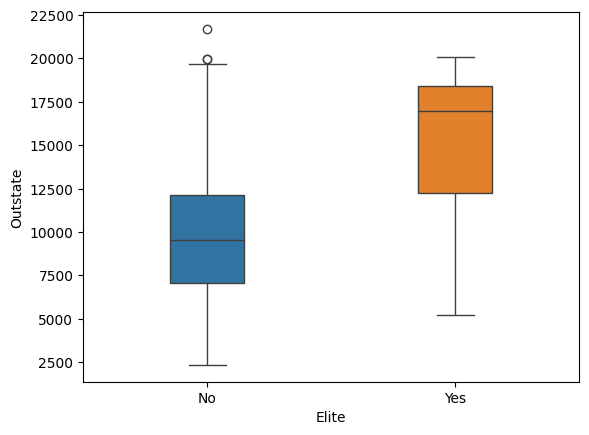

In [12]:
college["Elite"]=pd.cut(college["Top10perc"], [0, 50, 100], labels=["No", "Yes"])

print(college["Elite"].value_counts())

sns.boxplot(data=college, x="Elite", y="Outstate", hue="Elite", width=0.3)
plt.show()

#### Uppgift g)
Vi ska nu titta på några andra variabler, och undersöka dem med hjälp av histogram.

Det första histogrammet visar hur stor andel av studenterna som tar examen på respektive universitet. Vi ser att de ser förhållandevis normalfördelade ut, med ett medelvärde kring 65%. Dock verkar den allra högsta kategorin (95-100%) vara lite överrepresenterad. Man blir lite nyfiken på vad denna överrepresentation beror på! Handlar det i första hand om elitskolor, eller är det "flumskolor" som släpper igenom "kreti och pleti"? Detta ska vi försöka undersöka i nästa uppgift!

Därefter tittar vi på hur många procent av fakultetsmedlemmarna som har Ph.D.-grad, på respektive universitet. Här är fördelningen kraftigt förskjuten åt de högre procenten, med en tyngdpunkt kring 80%. Man hade kunnat vänta sig att det är de finaste och mest välrennomerade skolorna som intar de högsta platserna. Och visst ligger "_Ivy League_" högt i denna statistik, men här har även faktiskt många mindre kända skolor (med få ansökningar, låga avgifter, etc) smugit sig in bland topplaceringarna.

Det tredje histogrammet visar förhållandet mellan antagna studenter och antalet ansökningar. De flesta skolor ligger ganska lågt, kring 20-30%, vilket inte är så förvånande med tanke på att många nog skickar ansökningar till flera olika skolor. Bland de allra lägsta procenten hittar vi många av de mest välrenommerade skolorna, vilket inte heller är speciellt förvånande, då många hoppfulla studenter söker till de populäraste skolorna, men bara en liten exklusiv andel faktiskt blir antagna. I andra änden av skalan (d.v.s. hög andel antagna) hittar vi "skitskolor", sådana som ligger dåligt till i nästan alla jämförelsekriterier. Dessa skolor tar uppenbarligen emot nästan vem som helst som ansöker.

Slutligen tittar vi på __Expenditure per student__, alltså hur mycket som skolorna faktiskt spenderar på varje student! Denna statistik är lätt att glömma bort, för ofta tittar man bara på avgifterna som studenterna betalar. Men vad får man för pengarna? Var blir man mest "bortskämd"? Vi ser att det är en kraftig topp kring \$ 10 000/år, men att vi har några utliggare som ligger betydligt högre än så. Bland de skolor som ligger högst (spenderar mest på sina studenter) hittar vi de flesta skolor ur _Ivy League_, men allra högst ligger _Johns Hopkins University_ med över \$ 56 000/år. _Johns Hopkins_ gjorde sig kända för den bredare allmänheten under Corona-pandemin, då de levererade mycket innehållsrika sammanställningar av pandemisiffror världen över. Man måste ändå säga att det är lite anmärkningsvärt att det skiljer så mycket mellan skolorna, och en fråga som väcks är förstås: Finns det ett samband mellan anmälningsavgift och den summa pengar som satsas på varje student? D.v.s. får varje student (monetär) valuta för sina penagar? Detta ska vi snart titta närmare på!

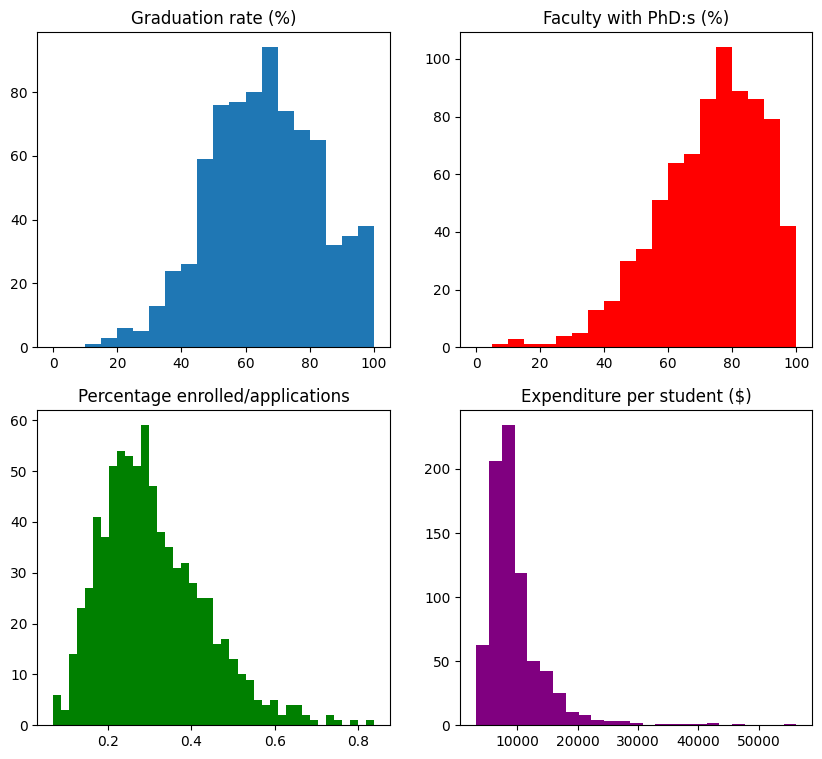

In [7]:
bins=np.linspace(0, 100, 21)

plt.figure(figsize=(10,9))

plt.subplot(2,2,1)
plt.hist(college["Grad.Rate"], bins=bins)       # One value (118) is obviously wrong, and dropped
plt.title("Graduation rate (%)")

plt.subplot(2,2,2)
plt.hist(college["PhD"], bins=bins, color="r")             # One value (103) is obviously wrong, and dropped
plt.title("Faculty with PhD:s (%)")

plt.subplot(2,2,3)
plt.hist(college["Enroll"]/college["Apps"], bins=40, color="g")
plt.title("Percentage enrolled/applications")

plt.subplot(2,2,4)
plt.hist(college["Expend"], bins=25, color="purple")
plt.title("Expenditure per student ($)")

plt.show()

#### Uppgift h)
Vi ska nu titta på några intressanta (eventuella) samband. Vi börjar med den avslutande frågan i förra uppgiften: Om du betalar hög avgift till skolan, kommer skolan att spendera mycket pengar på DIG? Och svaret är ja. Vi börjar med att beräkna korrelationen mellan _Instructional expenditure_ och _Out-of-state tuition_, och får ett värde på 0.67, vilket är ett tydligt samband. När vi plottar dem mot varandra ser vi trenden tydligt: En hög avgift gör att du kommer bli "bortskämd" på universitetet. Vi passar också på att färgkoda utifrån renommé, där vi låter Top25perc-variabeln vara ett mått på hur välrenommerad respektive skola är. Vi ser tydligt att de mest välrenommerade skolorna har såväl höga avgifter som _expenses_, även om några undantag finns.

Vår scatterplot ger ytterligare ett kvitto på något vi misstänkte i en tidigare uppgift: Att det finns någon form av max-tak när det gäller Outstate-avgiften. Om skolorna längst till höger i diagrammet (alltså de som spenderar mest på sina studenter) hade följt den huvudsakliga regressionslinjen i diagrammet, så hade de haft betydligt högre avgifter. Gissningsvis tar de igen detta på _In-state tuition_, men detta har vi ingen statistik på.

Correlation between Instructional expenditure and Out-of-state tuition is 0.67.


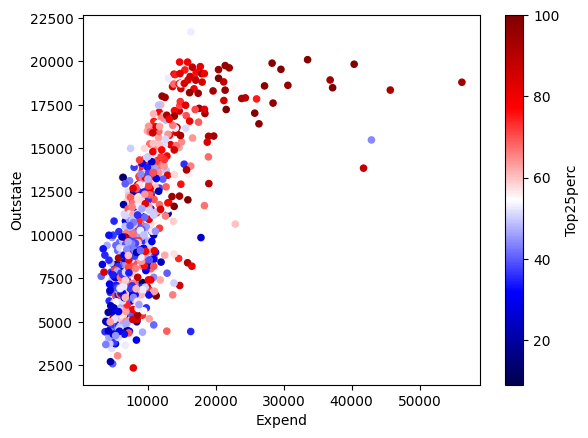

In [8]:
print(f"Correlation between Instructional expenditure and Out-of-state tuition is {round(college["Expend"].corr(college["Outstate"]),2)}.")

college.plot.scatter(x="Expend", y="Outstate", c="Top25perc", colormap="seismic")
plt.show()

Nästa sak vi ska undersöka är om det är elitskolorna som har den _lägsta_ andelen antagna i förhållande till antalet ansökningar. Det vore ganska naturligt, "alla" ansöker till de populära skolorna, men bara de allra bästa blir antagna. Det som möjligen skulle tala emot ett sådant samband, är att många av de mest kända och populära skolorna är ganska stora, och därmed tar emot många studenter.

Men den här gången högg vi i sten, åtminstone nästan. Det finns visserligen ett (negativt) samband mellan hur många procent av ansökningarna som resulterar i antagning, och andel top 25%-studenter, men sambandet är svagt, vi har en korrelation på -0.35. I plotten motsvarar storleken på varje markering universitetets storlek (Full-time undergraduates), men det finns ingen tydlig trend här heller, vi ser stora och små universitet huller om buller. Kanske går det att se någon skillnad mellan publika och privata skolor? Vi färgar bubblorna utefter detta kriterium, men inte heller här är det någon tydlig trend, _möjligen_ kan man se att det finns fler privata skolor bland dem med låg procent antagna.

Går det då inte att utläsa något alls? Jo, vi har ändå vårt förväntade "blå kluster" längst upp till vänster i diagrammet, vilket torde motsvara de allra mest kända universiteten, dit många söker men bara de bästa blir antagna. Men överlag blev jag överraskad över hur stor spridning, och otydliga trenderna var i den här jämförelsen.

En annan fråga väcks: Jag har i tidigare uppgifter varit ganska säker på att det finns ett tydligt samband mellan att vara _private_ och att ha hög andel studenter bland top 25%, eller top 10%. "Privatskola" _låter_ ju lite finare, eller hur? Men denna bubbelplot antyder att så kanske inte alls är fallet, åtminstone kanske inte sambandet är lika tydligt som jag trott. Vi undersöker detta i nästa jämförelse!

Correlation between enroll percentage and top 25 share is -0.35.


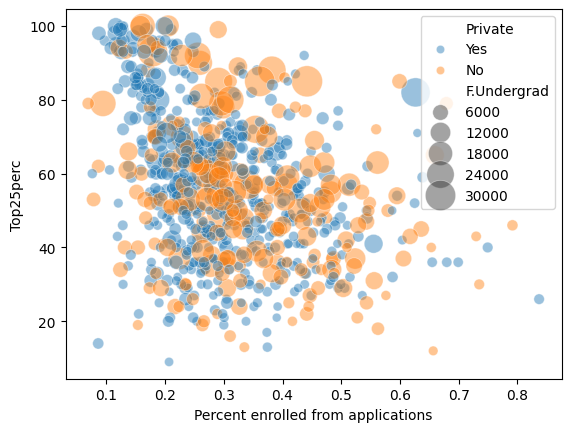

In [9]:

college["Percent_enroll"]=college["Enroll"]/college["Apps"]
print(f"Correlation between enroll percentage and top 25 share is {round(college["Percent_enroll"].corr(college["Top25perc"]),2)}.")
sns.scatterplot(data=college, x="Percent_enroll", y="Top25perc", size="F.Undergrad",
                alpha=0.45, hue="Private", sizes=(40, 500))
plt.xlabel("Percent enrolled from applications")
plt.show()

Vi vill alltså jämföra privatskolor med publika skolor för att se om de privata är lite "finare" eller "mer exklusiva". Men hur mäter vi det? Går vi efter popularitet, renommé, medlem av _Ivy League_ etc? Vi införde tidigare variabeln _Elite_ för de skolor som har över hälften av sina elever bland top 10%-skiktet i landet. Så vi bestämmer oss för att titta på såväl top 25%-skiktet som top 10%-skiktet. Jag trodde att de privata skolorna skulle vara kraftigt överrepresenterade när det gäller att ha många högpresterande elever, och de publika skolorna överrepresenterade i "andra änden".

Men mina fördomar kom på skam. Det är faktiskt ganska jämnt, oavsett hur man tittar. Bland de _allra_ mest högpresterande skolorna så dominerar de privata, men annars är det ingen större skillnad. Främsta förklaringen är väl kanske att ungefär 2/3 av skolorna är privata, så det är inte så "fint" eller "exklusivt" som det låter för oss svenskar. Det finns helt enkelt en salig blandning av privatskolor, vissa toppresterande, andra inte.

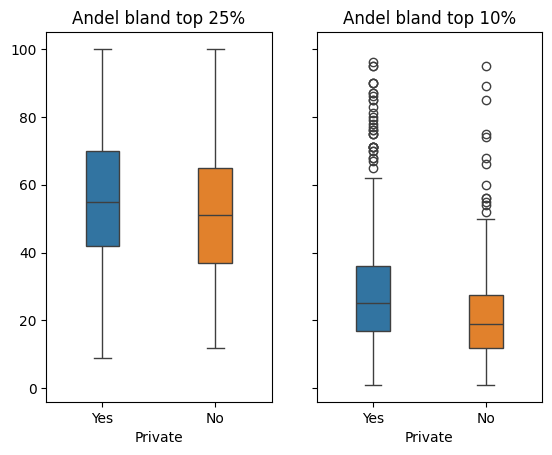

In [10]:
fig, ax=plt.subplots(1, 2, sharey=True)

plot1=sns.boxplot(data=college, x="Private", y="Top25perc", hue="Private", width=0.3, ax=ax[0])
plot1.set(ylabel=None)
plot1.set(title="Andel bland top 25%")
plot2=sns.boxplot(data=college, x="Private", y="Top10perc", hue="Private", width=0.3, ax=ax[1])
plot2.set(ylabel=None)
plot2.set(title="Andel bland top 10%")

plt.show()

Till sist vill vi titta lite på andelen studenter som tar examen från respektive universitet. Vi har tidigare sett att det skiljer ganska mycket, vi har något som liknar en normalfördelningskurva med relativt hög standardavvikelse, och medelvärde någonstans kring 65 %. Men vad är det som karakteriserar skolor med hög andel studenter som tar examen? Och är det över huvud taget "bra" om nästan alla tar examen, eller kan det signalera "slapphet" från skolans sida?

Efter att ha plottat __Graduation rate__ mot några andra variabler, kan jag konstatera att det faktiskt är svårt att se några tydliga samband. Det kanske bekräftar hypotesen att en hög andel studenter som tar examen skulle kunna tyda både på att skolan gör ett bra jobb med sina studenter, men också att skolan är "slapp" och släpper igenom vem som helst.

En avsaknad av samband är ju ett resultat i sig. Men man kan ju fundera lite på orsak och verkan. Hur väljer skolor att marknadsföra sig? Ett försäljningsargument skulle ju kunna vara "_Välj oss - vi har visserligen en hög avgift, men nästan alla tar examen!_" Det visar sig nämligen att det finns en viss korrelation mellan __Out-of-state__-avgiften och andelen som tar examen. Även om sambandet inte är solklart, så kan vi ju konstatera att det åtminstone inte finns en enda skola med hög avgift och låg andel studenter som tar examen.

För att samtidigt kunna jämföra ytterligare an variabel, passar vi på att färgkoda prickarna efter andelen anställda med Ph.D.-grad. Där kan vi konstatera att en hög andel Ph.D. är, om än inte en garant, så åtminstone något som ökar sannolikheten för att studenterna ska ta examen. Och en hög andel Ph.D. signalerar ju dessutom att det är en examen som "väger tungt".


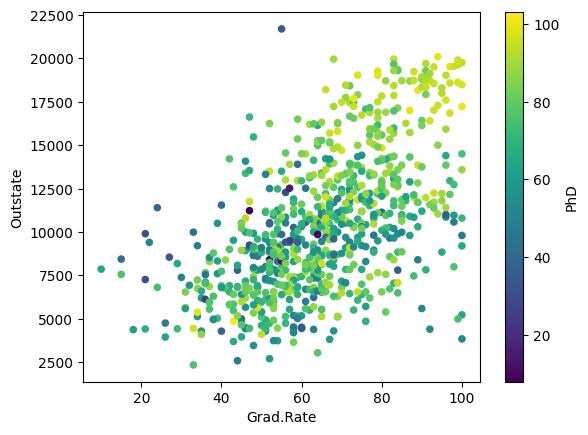

In [11]:
college4=college.drop("Cazenovia College")       # A value of 118 is dropped for obvious reasons
college4.plot.scatter(x="Grad.Rate", y="Outstate", c="PhD", colormap="viridis")
plt.show()